In [1]:
import json
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

from dredFISH.Analysis.__init__plots import *
from dredFISH.Analysis import basicu 
# from dredFISH.Analysis import powerplots
# from dredFISH.Design.model import *
# from dredFISH.Design.allen_data_iterators import DataIterCached

In [18]:
rootdat_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/' #02_reduced_class_longiter/'
!ls $rootdat_dir

dat_dir = rootdat_dir + '06-v3-simple-gene140_1.00e-05'
# dat_dir = dat_dir + '06-v3-simple-gene140_1.00e+00'
# fig_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/figures'

00_test_recon		     06-gene140			    07-v2-crse-drprt0.2
01_test_recon		     06-gene140_lmd01.00e-01	    07-v2-crse-drprt0.3
02-2_reduced_class_longiter  06-gene140_lmd01.00e+01	    07-v2-crse-drprt0.4
02_reduced_class	     06-gene140_lmd01.00e-03	    07-v2-crse-drprt0.5
03-1_gpu		     06-gene140_lmd01.00e+03	    07-v2-crse-drprt0.6
03-2_cpu		     06-gene140_lmd01.00e-05	    07-v2-crse-drprt0.7
04-1_gpu		     06-gene140_lmd01.00e+05	    07-v2-crse-drprt0.8
04-2_cpu		     06-v3-simple-gene140_1.00e+00  07-v2-crse-drprt0.9
05-1_drprt0.0		     06-v3-simple-gene140_1.00e-05  07-v2-fine-drprt0.0
05-1_drprt0.1		     06-v3-simple-gene140_1.00e+05  07-v2-fine-drprt0.1
05-1_drprt0.2		     06-v4-gene140_lmd01.00e+00     07-v2-fine-drprt0.2
05-1_drprt0.3		     06-v4-gene140_lmd01.00e-05     07-v2-fine-drprt0.3
05-1_drprt0.4		     06-v4-gene140_lmd01.00e+05     07-v2-fine-drprt0.4
05-1_drprt0.5		     06-v5-gene140_lmd01.00e+05     07-v2-fine-drprt0.5
05-1_drprt0.6		     07-crse			    07-v2-fine-dr

In [19]:
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/10X/genes.npy' 
tenx_genes = np.load(f)
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/SmartSeq/genes.npy' 
smrt_genes = np.load(f)

np.all(tenx_genes == smrt_genes)

genes = tenx_genes
genes.shape

(10861,)

# outputs
- embmat - a (ncell, nbit (24)) matrix
- model - a pytorch format
- results -- some summary statistics

- meta (what are these parameters?)
    - max-half_nrml-90000.0-1.27E+05-24-0-2.60E-09-0.01-1.0
    - max-half_nrml-90000.0-1.32E+05-24-0-3.40E-09-0.01-1.0
    
# input
- allen_data_iterator
    - original: `/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference`
    - cached: `/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference/cache/_2`

# the embmat

In [4]:
!ls $dat_dir

'embmat=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json'
'model=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.pt'
'result=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json'


In [20]:
# f = os.path.join(dat_dir, 'embmat=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json')
f = glob.glob(os.path.join(dat_dir, 'embmat*'))[0]
print(f)
              
with open(f, 'r') as fh:
    embmat = json.load(fh)
    embmat = np.array(embmat)
    print(embmat.shape)

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/06-v3-simple-gene140_1.00e-05/embmat=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json
(10861, 24)


# the results (statistics)

In [21]:
f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
print(f)

with open(f, 'r') as fh:
    res = json.load(fh)
    # res = np.array(res)
    # print(res.shape)
list(res.keys())
list(res['0'].keys())

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/06-v3-simple-gene140_1.00e-05/result=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.json


['smrt_rcn_lss', 'smrt_mrgn_lss', 'tenx_rcn_lss', 'tenx_mrgn_lss', 'row_cnst']

In [22]:
# res['0']['smrt_rcn_lss']
# res['0']['smrt_fine_acc']

In [23]:
_x = []
_y1 = []
_y2 = []
_y3 = []
_y4 = []

_y5 = []
_y6 = []

_y7 = []
_y8 = []

_y9 = []
_y10 = []
for _iter in res.keys():
    _x.append(_iter)
#     _y1.append(np.mean([val for key, val in res[_iter]['smrt_crse_acc'].items()]))
#     _y2.append(np.mean([val for key, val in res[_iter]['tenx_crse_acc'].items()]))
#     _y3.append(np.mean([val for key, val in res[_iter]['smrt_fine_acc'].items()]))
#     _y4.append(np.mean([val for key, val in res[_iter]['tenx_fine_acc'].items()]))
    
#     _y5.append(res[_iter]['dsc_lss'])
#     _y6.append(res[_iter]['row_cnst'])
    
    _y7.append(np.mean([val for key, val in res[_iter]['smrt_mrgn_lss'].items()]))
    _y8.append(np.mean([val for key, val in res[_iter]['tenx_mrgn_lss'].items()]))
    
    _y7.append(np.mean([val for key, val in res[_iter]['smrt_mrgn_lss'].items()]))
    _y8.append(np.mean([val for key, val in res[_iter]['tenx_mrgn_lss'].items()]))
    
    _y9.append(np.mean([val for key, val in res[_iter]['smrt_rcn_lss'].items()]))
    _y10.append(np.mean([val for key, val in res[_iter]['tenx_rcn_lss'].items()]))

_x = np.array(_x).astype(int)

In [24]:
# fig, ax = plt.subplots()
# ax.plot(_x, _y1, '-o', color='k', label='SMART-seq L3')
# ax.plot(_x, _y2, '-o', color='C1', label='10X L3' )
# ax.plot(_x, _y3, '-s', color='k', label='SMART-seq L5')
# ax.plot(_x, _y4, '-s', color='C1', label='10X L5' )
# ax.set_xlabel('Iteration')
# ax.set_ylabel('Classification accuracy\n(validation set)')
# ax.legend(bbox_to_anchor=(1,1))
# sns.despine(ax=ax)
# # powerplots.savefig_autodate(fig, os.path.join(fig_dir, "NN_classification_acc.pdf"))
# plt.show()

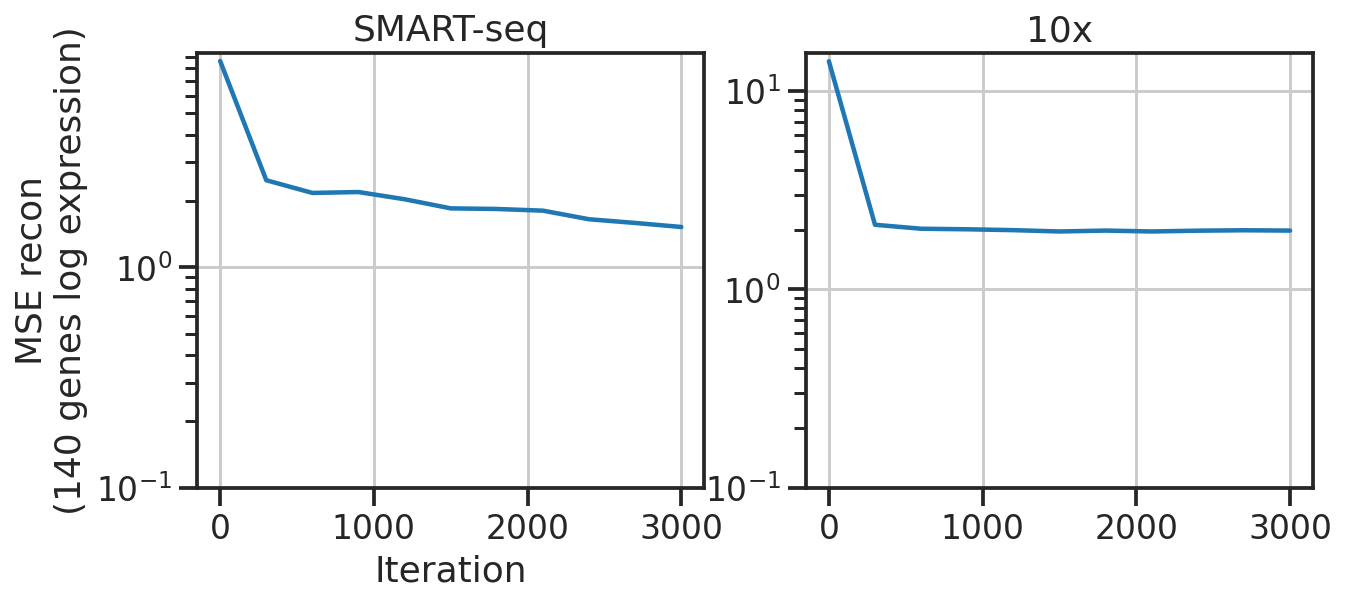

In [25]:
fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
ax.plot(_x, _y9, '-')
ax.set_title('SMART-seq')
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE recon\n(140 genes log expression)')
ax.set_yscale('log')
ax.set_ylim(1e-1)

ax = axs[1]
ax.plot(_x, _y10, '-')
ax.set_title('10x')
ax.set_yscale('log')
ax.set_ylim(1e-1)

plt.show()


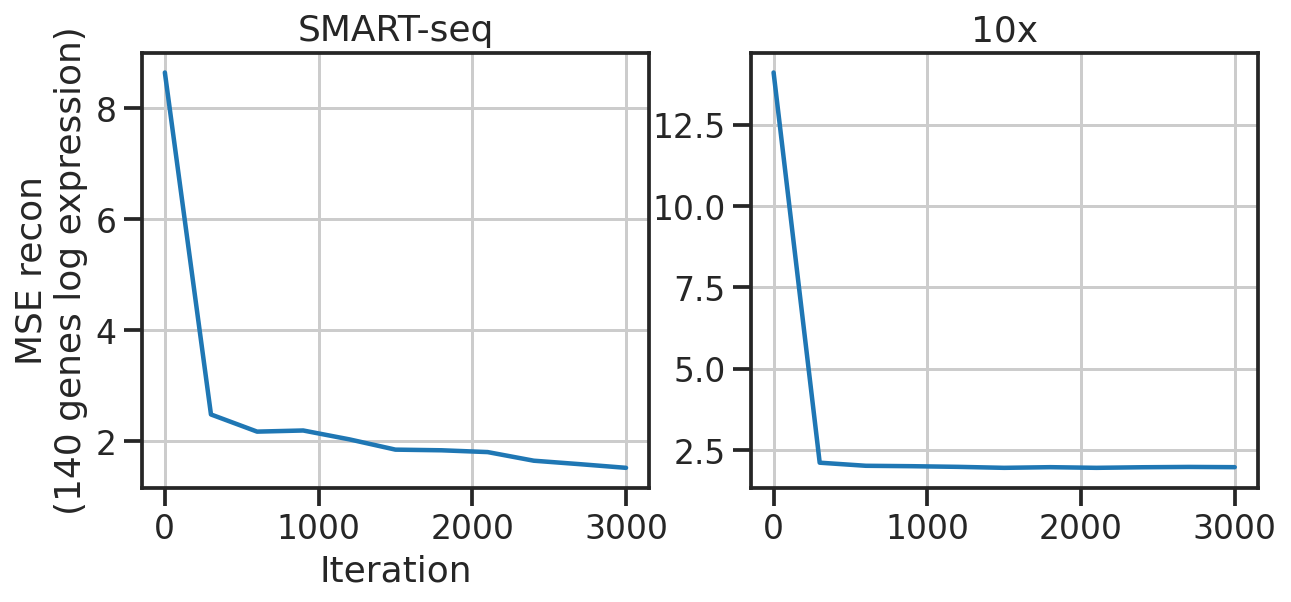

In [26]:

fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
ax.plot(_x, _y9, '-')
ax.set_title('SMART-seq')
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE recon\n(140 genes log expression)')

ax = axs[1]
ax.plot(_x, _y10, '-')
ax.set_title('10x')

plt.show()

## Calculate R2 per gene 
- on any data
- on validation data only

In [27]:
import torch
from dredFISH.Design.model_gene_recon_partial_simple import CellTypeNet
from dredFISH.Design.allen_data_iterators_subgenes import DataIterCached

def get_mse_torch(tnsr_true, tnsr_pred=[]):
    """Mean (over rows) squared error
    if no pred, returns the variance.
    """
    if len(tnsr_pred):
        mse = (tnsr_true - tnsr_pred).square().mean(axis=0)
    else:
        mse = (tnsr_true - tnsr_true.mean(axis=0)).square().mean(axis=0)
    return mse
        
def get_r2_torch(tnsr_true, tnsr_pred, zero_tol=1e-10):
    """
    """
    mse = get_mse_torch(tnsr_true, tnsr_pred)
    var = get_mse_torch(tnsr_true)
    r2 = 1-mse/torch.clamp(var, min=zero_tol)
    return r2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [28]:
# # get the model
# # run validation data through it
# # compare
# rootdat_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/' #02_reduced_class_longiter/'
# !ls $rootdat_dir

In [29]:
# dat_dir = rootdat_dir + '06-v4-gene140_lmd01.00e-05'
# dat_dir = rootdat_dir + '06-v4-gene140_lmd01.00e+00'
# dat_dir = rootdat_dir + '06-v4-gene140_lmd01.00e+05'

# prep the model
f = glob.glob(os.path.join(dat_dir, 'model*'))[0]
print(f)

reduction, cnst, mxpr, min_pos, n_bit, drprt, lmd1, lmd2, lmd3 = (os.path.basename(f)
                                                                        [len('model='):-len('.pt')]
                                                                        .replace('E-', 'expn').split('-')
                                                                 )
lmd0 = 1
min_pos = np.float64(min_pos)
mxpr = np.float64(mxpr)
min_pos = np.float64(min_pos)
n_bit = int(n_bit)
drprt = np.float64(drprt)
lmd1 = np.float64(lmd1.replace('expn', 'E-'))
lmd2 = np.float64(lmd2)
lmd3 = np.float64(lmd3)
reduction, cnst, mxpr, min_pos, n_bit, drprt, lmd1, lmd2, lmd3

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/06-v3-simple-gene140_1.00e-05/model=max-half_nrml-90000.0-2.00E+05-24-0-1.00E-10-0.01-1.0.pt


('max', 'half_nrml', 90000.0, 200000.0, 24, 0.0, 1e-10, 0.01, 1.0)

In [30]:
# load the data
data_iter= DataIterCached(n_iter= 2000)

# load the model
model= CellTypeNet(n_gns=     data_iter.current['tenx_ftrs'].shape[1],                      # fixed
                   n_cat=     data_iter.labl_map.shape[1],                                  # fixed
                   lab_map=   data_iter.labl_map,                                           # reasonable val
                   gsubidx=   data_iter.gsubidx,
                   cnst=      'half_nrml',                                                  # reasonable val
                   reduction= 'max',                                                        # reasonable val
                   n_bit=     24,                                                           # fixed
                   min_pos=   min_pos,                                                      # -- tune
                   lmd0=      lmd0,
                   lmd1=      lmd1,                                                         # -- tune
                   lmd2=      1e-2,                                                         # reasonable val
                   lmd3=      1e-0,                                                         # reasonable val
                   drprt=     0                                                             # reasonable val (dropout applied at the gene level)
                  )
model.load_state_dict(torch.load(f, map_location=device))
# model.eval()


<All keys matched successfully>

In [31]:
model.eval()

# evaluate
i = 0
data= data_iter.validation()
with torch.no_grad():
    # print(list(data['tenx'].keys()))
    tenx_ftrs = []
    tenx_ftrs_gsub = []
    for l in data['tenx']:
        if l != -1 and len(data['tenx'][l]): # what is -1 cluster? might just avoid it...
            _tenx_ftrs= data['tenx'][l]['tenx_ftrs'].to(device)
            _tenx_ftrs_gsub= (_tenx_ftrs[:,model.gsubidx]+1).log() # log(x+1) norm
            tenx_ftrs.append(_tenx_ftrs)
            tenx_ftrs_gsub.append(_tenx_ftrs_gsub)
            
    tenx_ftrs = torch.cat(tenx_ftrs, 0)
    tenx_ftrs_gsub = torch.cat(tenx_ftrs_gsub, 0)
    tenx_ftrs_rcn, tenx_emb, tenx_mrgn= model.forward(tenx_ftrs, rnd=True)
    
    smrt_ftrs = []
    smrt_ftrs_gsub = []
    for l in data['smrt']:
        if l != -1 and len(data['smrt'][l]): # what is -1 cluster? might just avoid it...
            _smrt_ftrs= data['smrt'][l]['smrt_ftrs'].to(device)
            _smrt_ftrs_gsub= (_smrt_ftrs[:,model.gsubidx]+1).log() # log(x+1) norm
            smrt_ftrs.append(_smrt_ftrs)
            smrt_ftrs_gsub.append(_smrt_ftrs_gsub)
            
    smrt_ftrs = torch.cat(smrt_ftrs, 0)
    smrt_ftrs_gsub = torch.cat(smrt_ftrs_gsub, 0)
    smrt_ftrs_rcn, smrt_emb, smrt_mrgn= model.forward(smrt_ftrs, rnd=True)
    
    tenx_r2 = get_r2_torch(tenx_ftrs_gsub, tenx_ftrs_rcn)
    smrt_r2 = get_r2_torch(smrt_ftrs_gsub, smrt_ftrs_rcn)

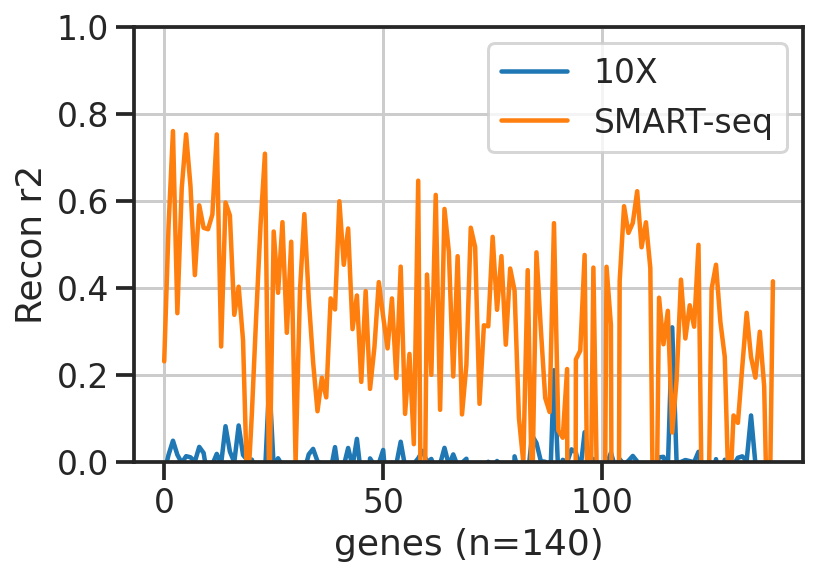

In [32]:
fig, ax = plt.subplots()
ax.plot(tenx_r2, label='10X')
ax.plot(smrt_r2, label='SMART-seq')
ax.set_ylim([0,1])
ax.set_ylabel('Recon r2')
ax.set_xlabel(f'genes (n={len(tenx_r2)})')
ax.legend()
plt.show()